# Clustering(Red Wine)

## 1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder

r_data= pd.read_csv("C:/Users/min/Documents/SocialCom/WineClass/winequality-red.csv")
r_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. 분석 준비

In [2]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

x = r_data[features].values
print(x)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [3]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


## 3. tSNE를 활용한 임베딩

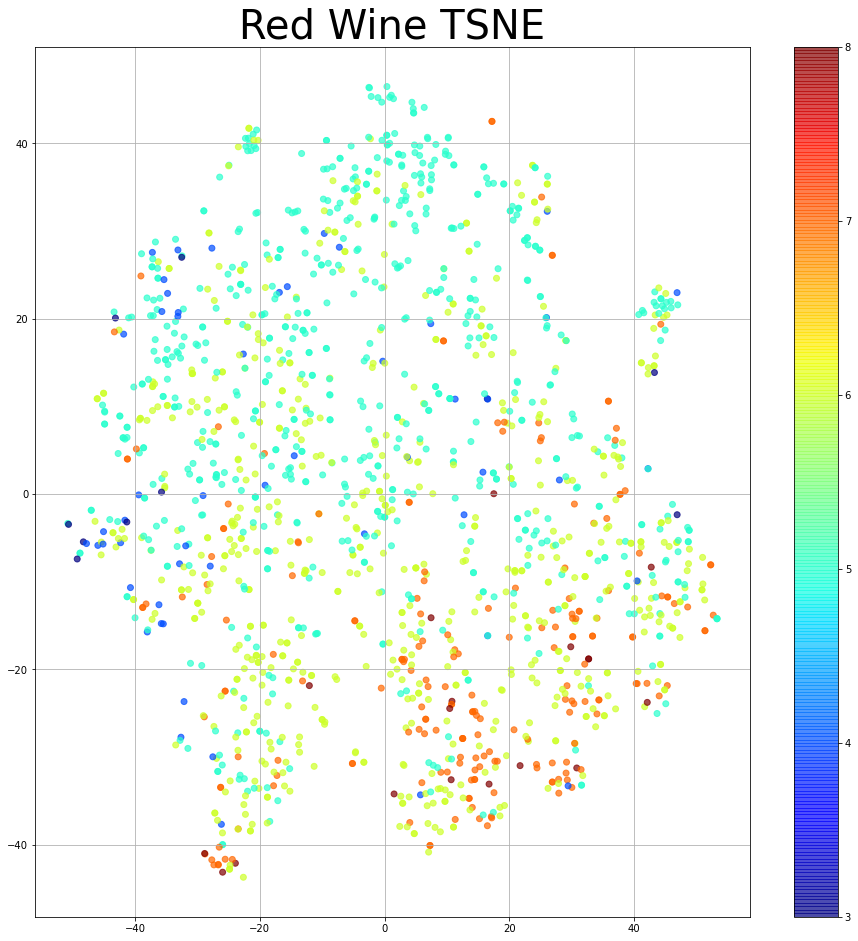

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=700)

low_dim_embs = tsne.fit_transform(x)
labels = r_data['quality'].values

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1,1,1)
ax.set_title('Red Wine TSNE', fontsize=40)

ss = ax.scatter(low_dim_embs[:,0], low_dim_embs[:,1], alpha=0.7, c=labels, cmap='jet')

plt.colorbar(ss)
ax.grid()

## 4. k-Means Clustering

- 몇 개의 클러스터가 적절한지 탐색하기 위해 k값에 따른 distance의 변화 양상을 그래프로 표현
- distance: Kmeans_inertia_를 이용하여 '각 sample과 그것의 가장 가까운 cluster center 간 거리 제곱의 합'으로 표현

C:\Users\min\anaconda_3\envs\socialcom\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\min\anaconda_3\envs\socialcom\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\min\anaconda_3\envs\socialcom\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\min\anaconda_3\envs\socialcom\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


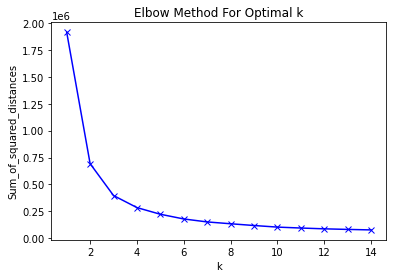

In [6]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(r_data)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

- 그래프에 따르면 elbow point는 4~6 사이의 지점, 특히 5 지점에서 나타난다고 볼 수 있음
- 더욱 정확한 판단을 위해 k=4, k=5, k=6 각각에서 클러스터링이 어떻게 나타나는지 이하 코드로 확인

### 4.1 k = 4

C:\Users\min\anaconda_3\envs\socialcom\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


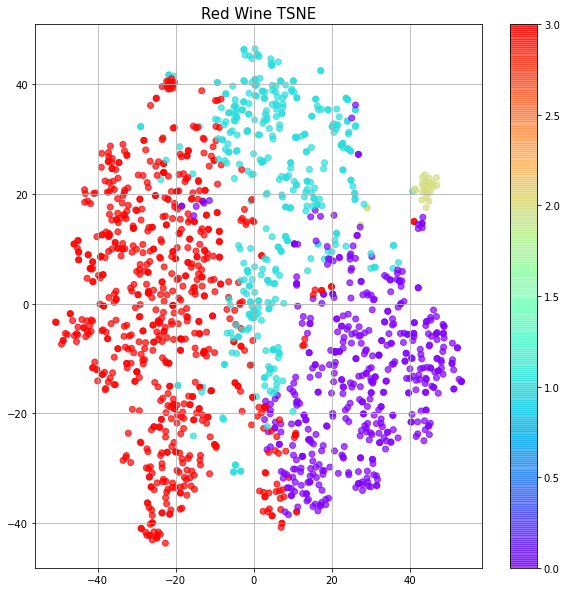

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)

labels = kmeans.labels_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Red Wine TSNE', fontsize=15)
ss = ax.scatter(low_dim_embs[:,0], low_dim_embs[:,1], alpha=0.7, c=labels,cmap='rainbow')
plt.colorbar(ss)
ax.grid()

### 4.2 k = 5

C:\Users\min\anaconda_3\envs\socialcom\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


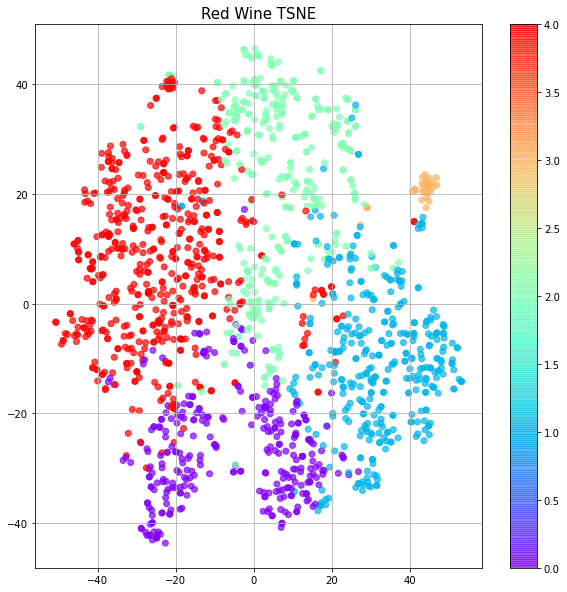

In [9]:
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(x)

labels2 = kmeans2.labels_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Red Wine TSNE', fontsize=15)
ss = ax.scatter(low_dim_embs[:,0], low_dim_embs[:,1], alpha=0.7, c=labels2,cmap='rainbow')
plt.colorbar(ss)
ax.grid()

### 4.3 k = 6

C:\Users\min\anaconda_3\envs\socialcom\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


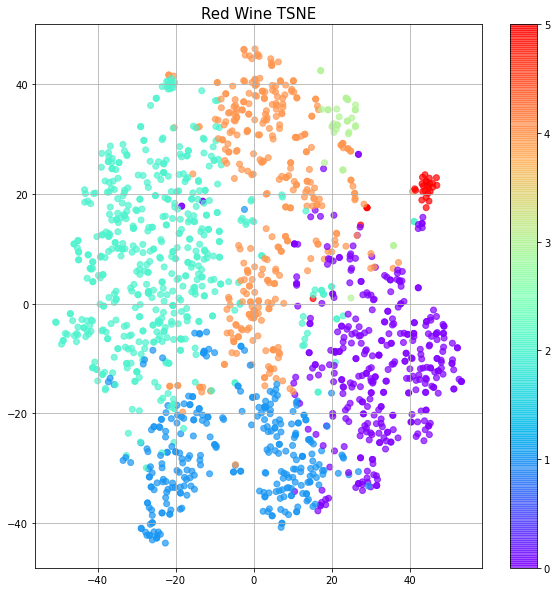

In [10]:
kmeans3 = KMeans(n_clusters=6)
kmeans3.fit(x)

labels3 = kmeans3.labels_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Red Wine TSNE', fontsize=15)
ss = ax.scatter(low_dim_embs[:,0], low_dim_embs[:,1], alpha=0.7, c=labels3,cmap='rainbow')
plt.colorbar(ss)
ax.grid()

##### 결론: k값이 4, 5, 6인 경우 중 5일 때 클러스터링이 가장 잘 된 것으로 관찰된다.